In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10, 6]
%config InlineBackend.figure_format = 'retina'
import pylab as pl
import numexpr as ne
import plotly.express as px
import seaborn

In [2]:
attrData = pd.read_csv("PlayerAttributeData.csv", index_col=[0], low_memory=False)
attrData = attrData.drop(columns=['GK diving', 'GK reflexes', 'GK handling', 'GK kicking','GK positioning','ID', 'Crossing', 'Curve', 
                                 'Long passing', 'Long shots', 'Marking', 'Penalties', 'Short passing', 'Sliding tackle', 'Standing tackle',
                                 'Vision', 'Volleys', 'Heading accuracy', 'Positioning', 'Jumping', 'Finishing'])
attrData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17981 entries, 0 to 17980
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Acceleration        17981 non-null  object
 1   Aggression          17981 non-null  object
 2   Agility             17981 non-null  object
 3   Balance             17981 non-null  object
 4   Ball control        17981 non-null  object
 5   Composure           17981 non-null  object
 6   Dribbling           17981 non-null  object
 7   Free kick accuracy  17981 non-null  object
 8   Interceptions       17981 non-null  object
 9   Reactions           17981 non-null  object
 10  Shot power          17981 non-null  object
 11  Sprint speed        17981 non-null  object
 12  Stamina             17981 non-null  object
 13  Strength            17981 non-null  object
dtypes: object(14)
memory usage: 2.1+ MB


In [3]:
persData = pd.read_csv('PlayerPersonalData.csv', index_col = [0])
persData = persData.drop(persData.loc[:,:'ID'], axis=1)
persData = persData.drop(['Photo','Special', 'Flag', 'Club Logo'], axis=1)
persData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17981 entries, 0 to 17980
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         17981 non-null  object
 1   Age          17981 non-null  int64 
 2   Nationality  17981 non-null  object
 3   Overall      17981 non-null  int64 
 4   Potential    17981 non-null  int64 
 5   Club         17733 non-null  object
 6   Value        17981 non-null  object
 7   Wage         17981 non-null  object
dtypes: int64(3), object(5)
memory usage: 1.2+ MB


In [4]:
df1 = pd.DataFrame.copy(attrData)

In [5]:
df1[['Wage', 'Value', 'Age']] = persData[['Wage', 'Value', 'Age']]

In [6]:
temp = pd.Series.copy(df1.Wage)
temp[temp.str.endswith('K')] = temp[temp.str.endswith('K')].str.replace('€','').str.replace('K','000')
temp[temp.str.endswith('€0')] = temp[temp.str.endswith('€0')].str.replace('€0','0')
temp = temp.astype(np.float32)
df1.Wage = temp

temp = pd.Series.copy(df1.Value)
temp[temp.str.endswith('€0')] = temp[temp.str.endswith('€0')].str.replace('€0','0')
temp[temp.str.contains('€')] = temp[temp.str.contains('€')].str.replace('€','')
temp[temp.str.endswith('.1M')] = temp[temp.str.endswith('.1M')].str.replace('.1M','100000')
temp[temp.str.endswith('.2M')] = temp[temp.str.endswith('.2M')].str.replace('.2M','200000')
temp[temp.str.endswith('.3M')] = temp[temp.str.endswith('.3M')].str.replace('.3M','300000')
temp[temp.str.endswith('.4M')] = temp[temp.str.endswith('.4M')].str.replace('.4M','400000')
temp[temp.str.endswith('.5M')] = temp[temp.str.endswith('.5M')].str.replace('.5M','500000')
temp[temp.str.endswith('.6M')] = temp[temp.str.endswith('.6M')].str.replace('.6M','600000')
temp[temp.str.endswith('.7M')] = temp[temp.str.endswith('.7M')].str.replace('.7M','700000')
temp[temp.str.endswith('.8M')] = temp[temp.str.endswith('.8M')].str.replace('.8M','800000')
temp[temp.str.endswith('.9M')] = temp[temp.str.endswith('.9M')].str.replace('.9M','900000')
temp[temp.str.endswith('M')] = temp[temp.str.endswith('M')].str.replace('M','000000')
temp[temp.str.endswith('K')] = temp[temp.str.endswith('K')].str.replace('K','000')
temp = temp.astype(np.float32)
df1.Value = temp

C:\Users\raim1\AppData\Local\Temp\ipykernel_13544\3169245118.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  temp[temp.str.endswith('.1M')] = temp[temp.str.endswith('.1M')].str.replace('.1M','100000')
C:\Users\raim1\AppData\Local\Temp\ipykernel_13544\3169245118.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  temp[temp.str.endswith('.2M')] = temp[temp.str.endswith('.2M')].str.replace('.2M','200000')
C:\Users\raim1\AppData\Local\Temp\ipykernel_13544\3169245118.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  temp[temp.str.endswith('.3M')] = temp[temp.str.endswith('.3M')].str.replace('.3M','300000')
C:\Users\raim1\AppData\Local\Temp\ipykernel_13544\3169245118.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  temp[temp.str.endswith('.4M')] = temp[temp.str.endswith('.4M')].str.

In [7]:
df1

Acceleration Aggression Agility Balance Ball control Composure  \
0               89         63      89      63           93        95   
1               92         48      90      95           95        96   
2               94         56      96      82           95        92   
3               88         78      86      60           91        83   
4               58         29      52      35           48        70   
...            ...        ...     ...     ...          ...       ...   
17976           24         16      38      26           12        23   
17977           25         44      35      44           22        44   
17978           66         26      60      77           41        50   
17979           57         46      58      74           43        45   
17980           48         52      49      47           32        33   

      Dribbling Free kick accuracy Interceptions Reactions Shot power  \
0            91                 76            29        96         94   
1            97                 90            22        95         85   
2            96                 84            36        88         80   
3            86                 84            41        93         87   
4            30                 11            30        85         25   
...         ...                ...           ...       ...        ...   
17976        12                 12             9        40         19   
17977        11                 11            16        51         13   
17978        37                 25            16        54         42   
17979        41                 34            46        49         43   
17980        23                 17            38        40         21   

      Sprint speed Stamina Strength      Wage        Value  Age  
0               91      92       80  565000.0   95500000.0   32  
1               87      73       59  565000.0  105000000.0   30  
2               90      78       53  280000.0  123000000.0   25  
3               77      89       80  510000.0   97000000.0   30  
4               61      44       83  230000.0   61000000.0   31  
...            ...     ...      ...       ...          ...  ...  
17976           32      28       50    1000.0      50000.0   17  
17977           25      32       47    1000.0          0.0   47  
17978           51      33       32    1000.0      60000.0   17  
17979           58      49       46    1000.0      60000.0   18  
17980           49      55       67    1000.0      50000.0   18  

[17981 rows x 17 columns]

In [8]:
for index in range(df1.shape[0]-1):
    if df1.iloc[index].str.contains('\+|\-', regex = True).any():
        df1.iloc[index] = df1.eval(df1.iloc[index])
# Was successfully performed.
df1.Acceleration = df1.Acceleration.astype(np.int8)
df1.Aggression = df1.Aggression.astype(np.int8)
df1.Agility = df1.Agility.astype(np.int8)
df1.Balance = df1.Balance.astype(np.int8)
df1['Ball control'] = df1['Ball control'].astype(np.int8)
df1.Composure = df1.Composure.astype(np.int8)
df1.Dribbling = df1.Dribbling.astype(np.int8)
df1['Free kick accuracy'] = df1['Free kick accuracy'].astype(np.int8)
df1.Interceptions = df1.Interceptions.astype(np.int8)
df1.Reactions = df1.Reactions.astype(np.int8)
df1['Shot power'] = df1['Shot power'].astype(np.int8)
df1['Sprint speed'] = df1['Sprint speed'].astype(np.int8)
df1.Stamina = df1.Stamina.astype(np.int8)
df1.Strength = df1.Strength.astype(np.int8)
df3 = pd.DataFrame.copy(df1)

In [9]:
df1['Club'] = persData['Club']
df1['Nationality'] = persData['Nationality']

clubs = df1[persData.Overall>85].Club.value_counts(sort=False).reset_index()['index']
mask = df1['Club'].str.contains('|'.join(clubs)).astype(bool)
df1 = df1[mask]
df1 = df1[~df1['Club'].isnull()]
df1 = df1.reset_index(drop=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Acceleration        614 non-null    int8   
 1   Aggression          614 non-null    int8   
 2   Agility             614 non-null    int8   
 3   Balance             614 non-null    int8   
 4   Ball control        614 non-null    int8   
 5   Composure           614 non-null    int8   
 6   Dribbling           614 non-null    int8   
 7   Free kick accuracy  614 non-null    int8   
 8   Interceptions       614 non-null    int8   
 9   Reactions           614 non-null    int8   
 10  Shot power          614 non-null    int8   
 11  Sprint speed        614 non-null    int8   
 12  Stamina             614 non-null    int8   
 13  Strength            614 non-null    int8   
 14  Wage                614 non-null    float32
 15  Value               614 non-null    float32
 16  Age     

<AxesSubplot:title={'center':'Correlation of age and wage btw player attr data'}>

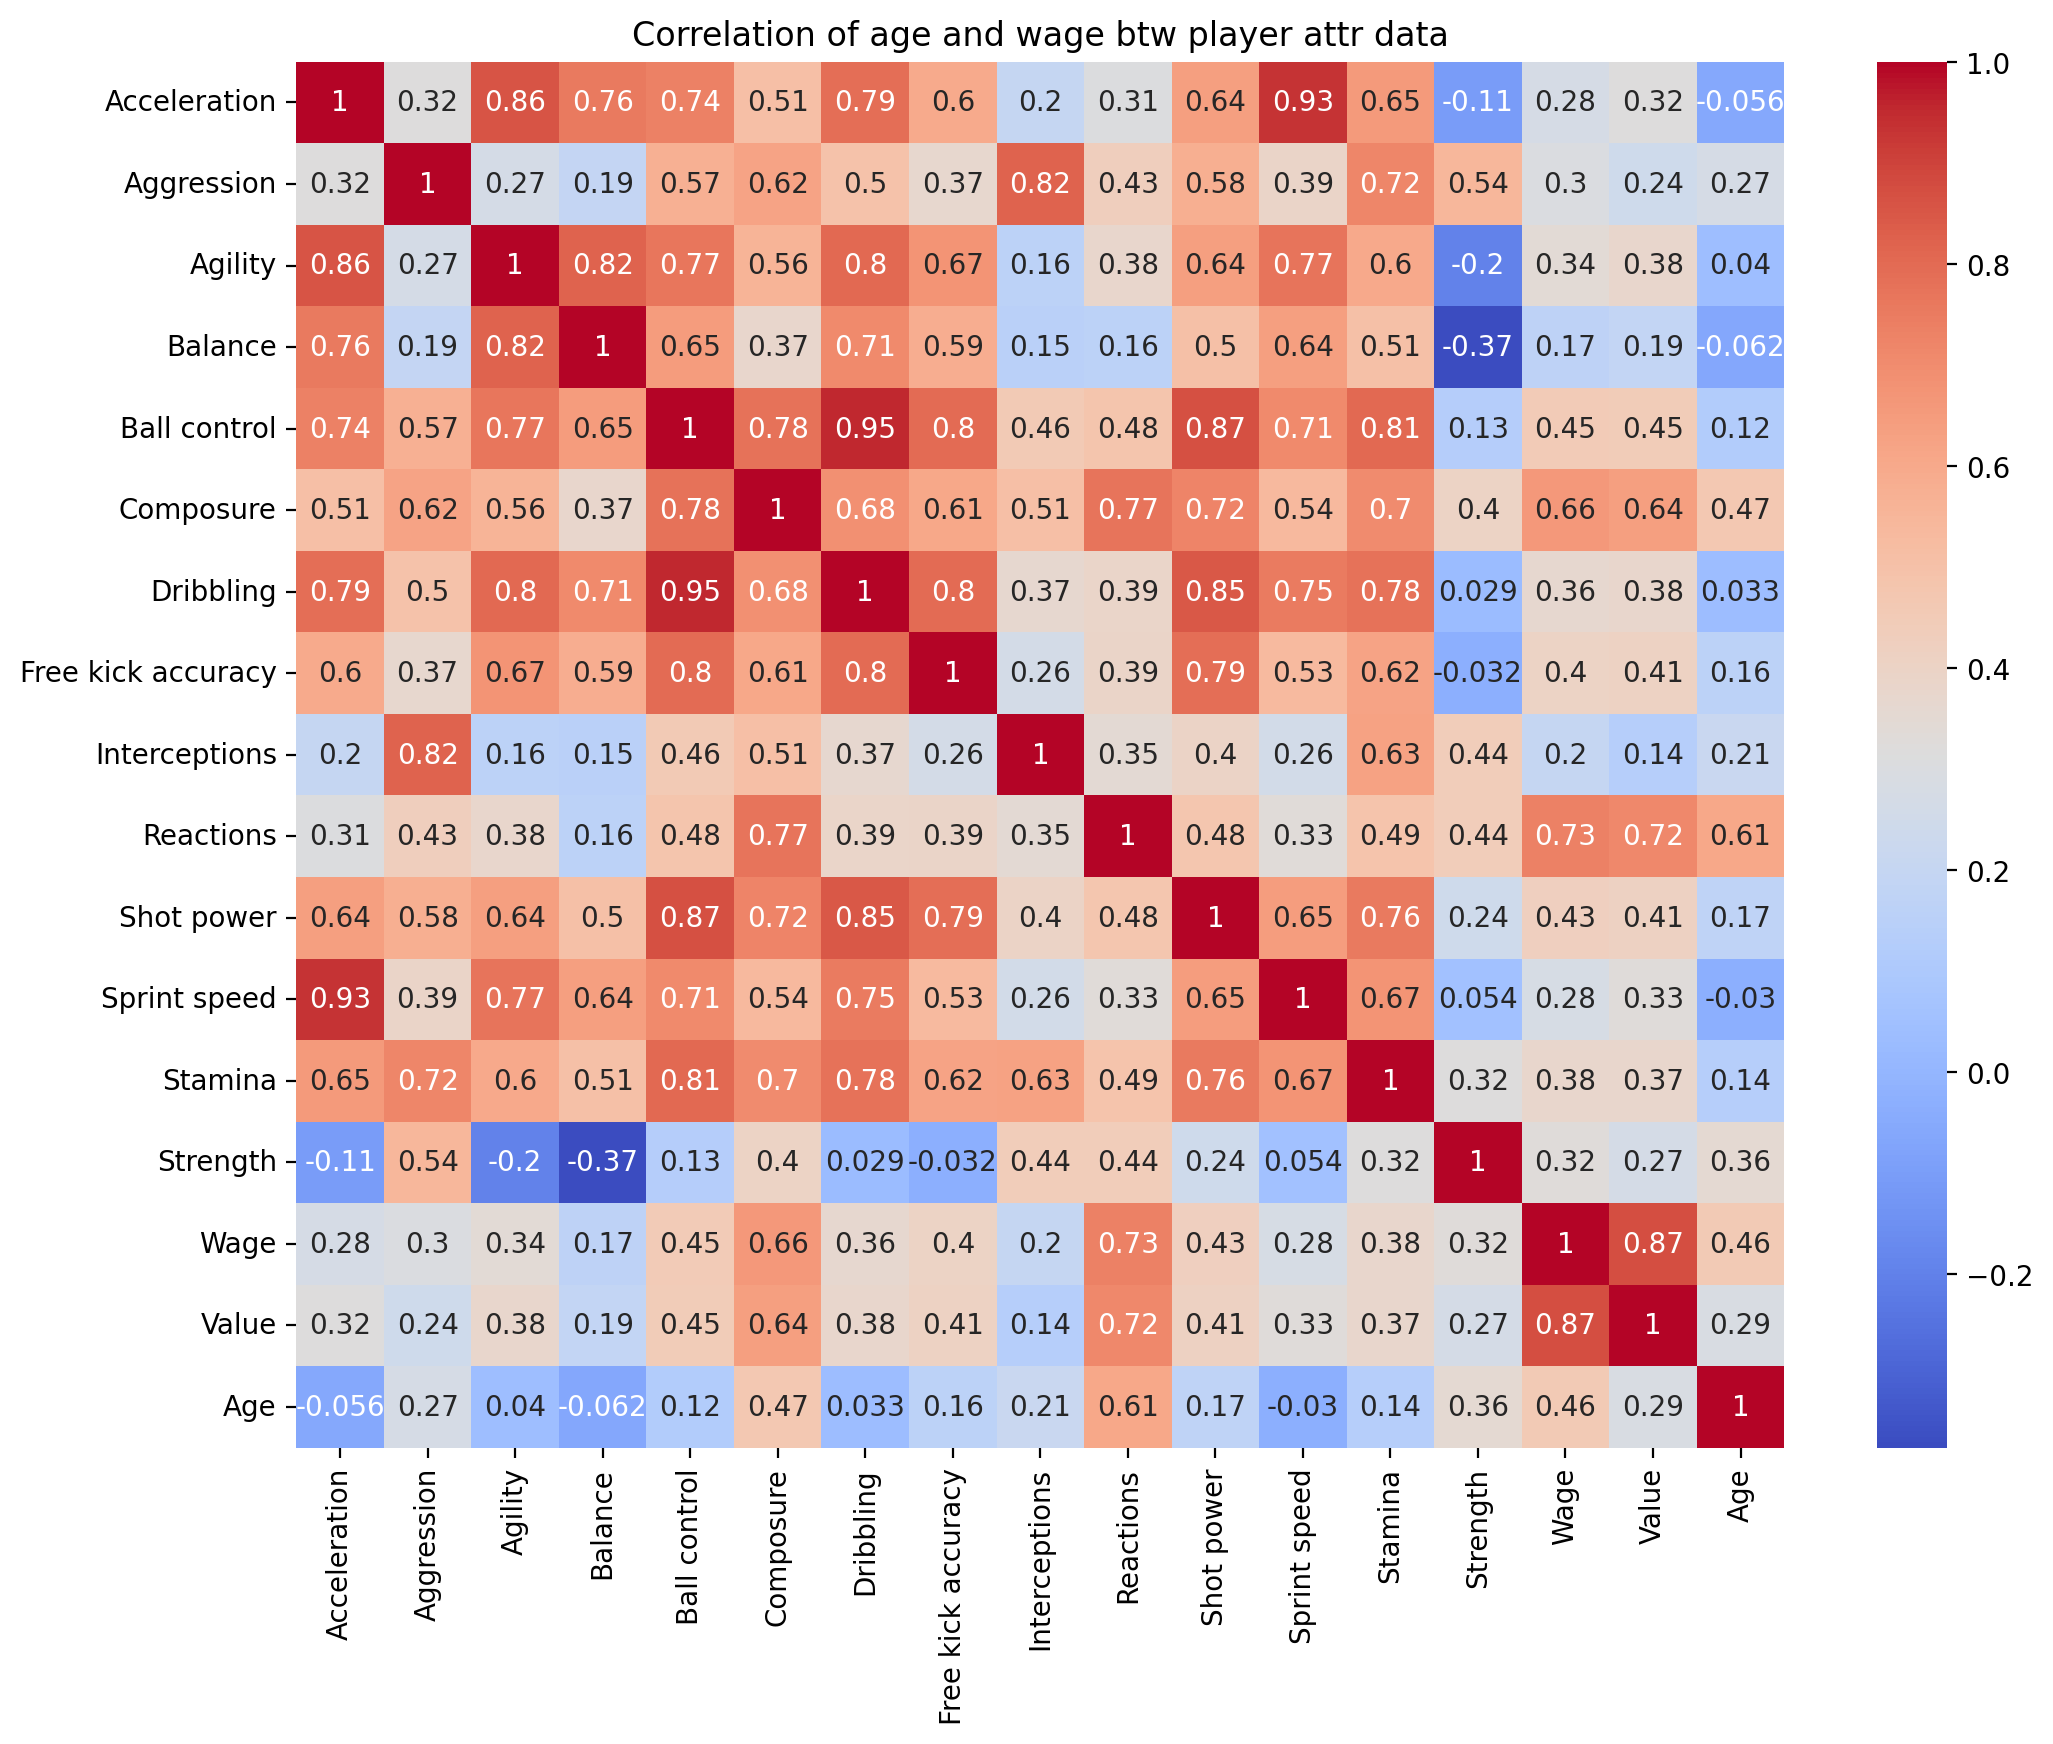

In [10]:
plt.figure(figsize=(12,9))
pl.title("Correlation of age and wage btw player attr data")
seaborn.heatmap(df1.corr(), annot=True, cmap="coolwarm")

In [11]:
df2 = pd.DataFrame({'Club':clubs})
df2['WageMean'] = np.arange(df2.size, dtype=np.float32)

In [12]:
j = 0
for x in df2['Club']:
    df2.loc[j, 'WageMean'] = df1[df1['Club']==x].Wage.mean()
    j = j + 1
df2=df2.set_index('Club')

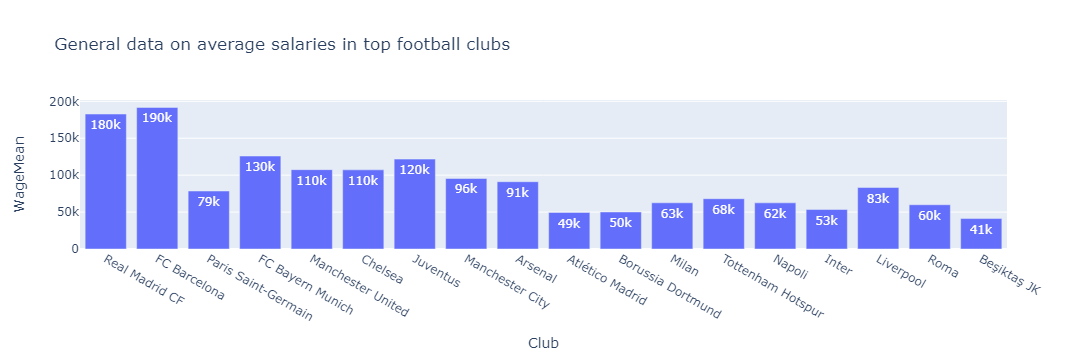

In [13]:
fig = px.bar(df2, y='WageMean', text_auto='.2s',
            title="General data on average salaries in top football clubs")
fig.show()

In [34]:
df3['Club'] = persData['Club']
df3 = df3[~df3['Club'].isnull()]
df3 = df3.reset_index(drop=True)

In [37]:
df3 = df3[~df3['Club'].isin(clubs)]
df3 = df3.reset_index(drop=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16442 entries, 0 to 16441
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Acceleration        16442 non-null  int8   
 1   Aggression          16442 non-null  int8   
 2   Agility             16442 non-null  int8   
 3   Balance             16442 non-null  int8   
 4   Ball control        16442 non-null  int8   
 5   Composure           16442 non-null  int8   
 6   Dribbling           16442 non-null  int8   
 7   Free kick accuracy  16442 non-null  int8   
 8   Interceptions       16442 non-null  int8   
 9   Reactions           16442 non-null  int8   
 10  Shot power          16442 non-null  int8   
 11  Sprint speed        16442 non-null  int8   
 12  Stamina             16442 non-null  int8   
 13  Strength            16442 non-null  int8   
 14  Wage                16442 non-null  float32
 15  Value               16442 non-null  float32
 16  Age 

In [16]:
bPlAtt = df3.loc[:,"Acceleration" : 'Strength'].mean()
aPlAtt = df1.loc[:,"Acceleration" : 'Strength'].mean()
X = aPlAtt.index

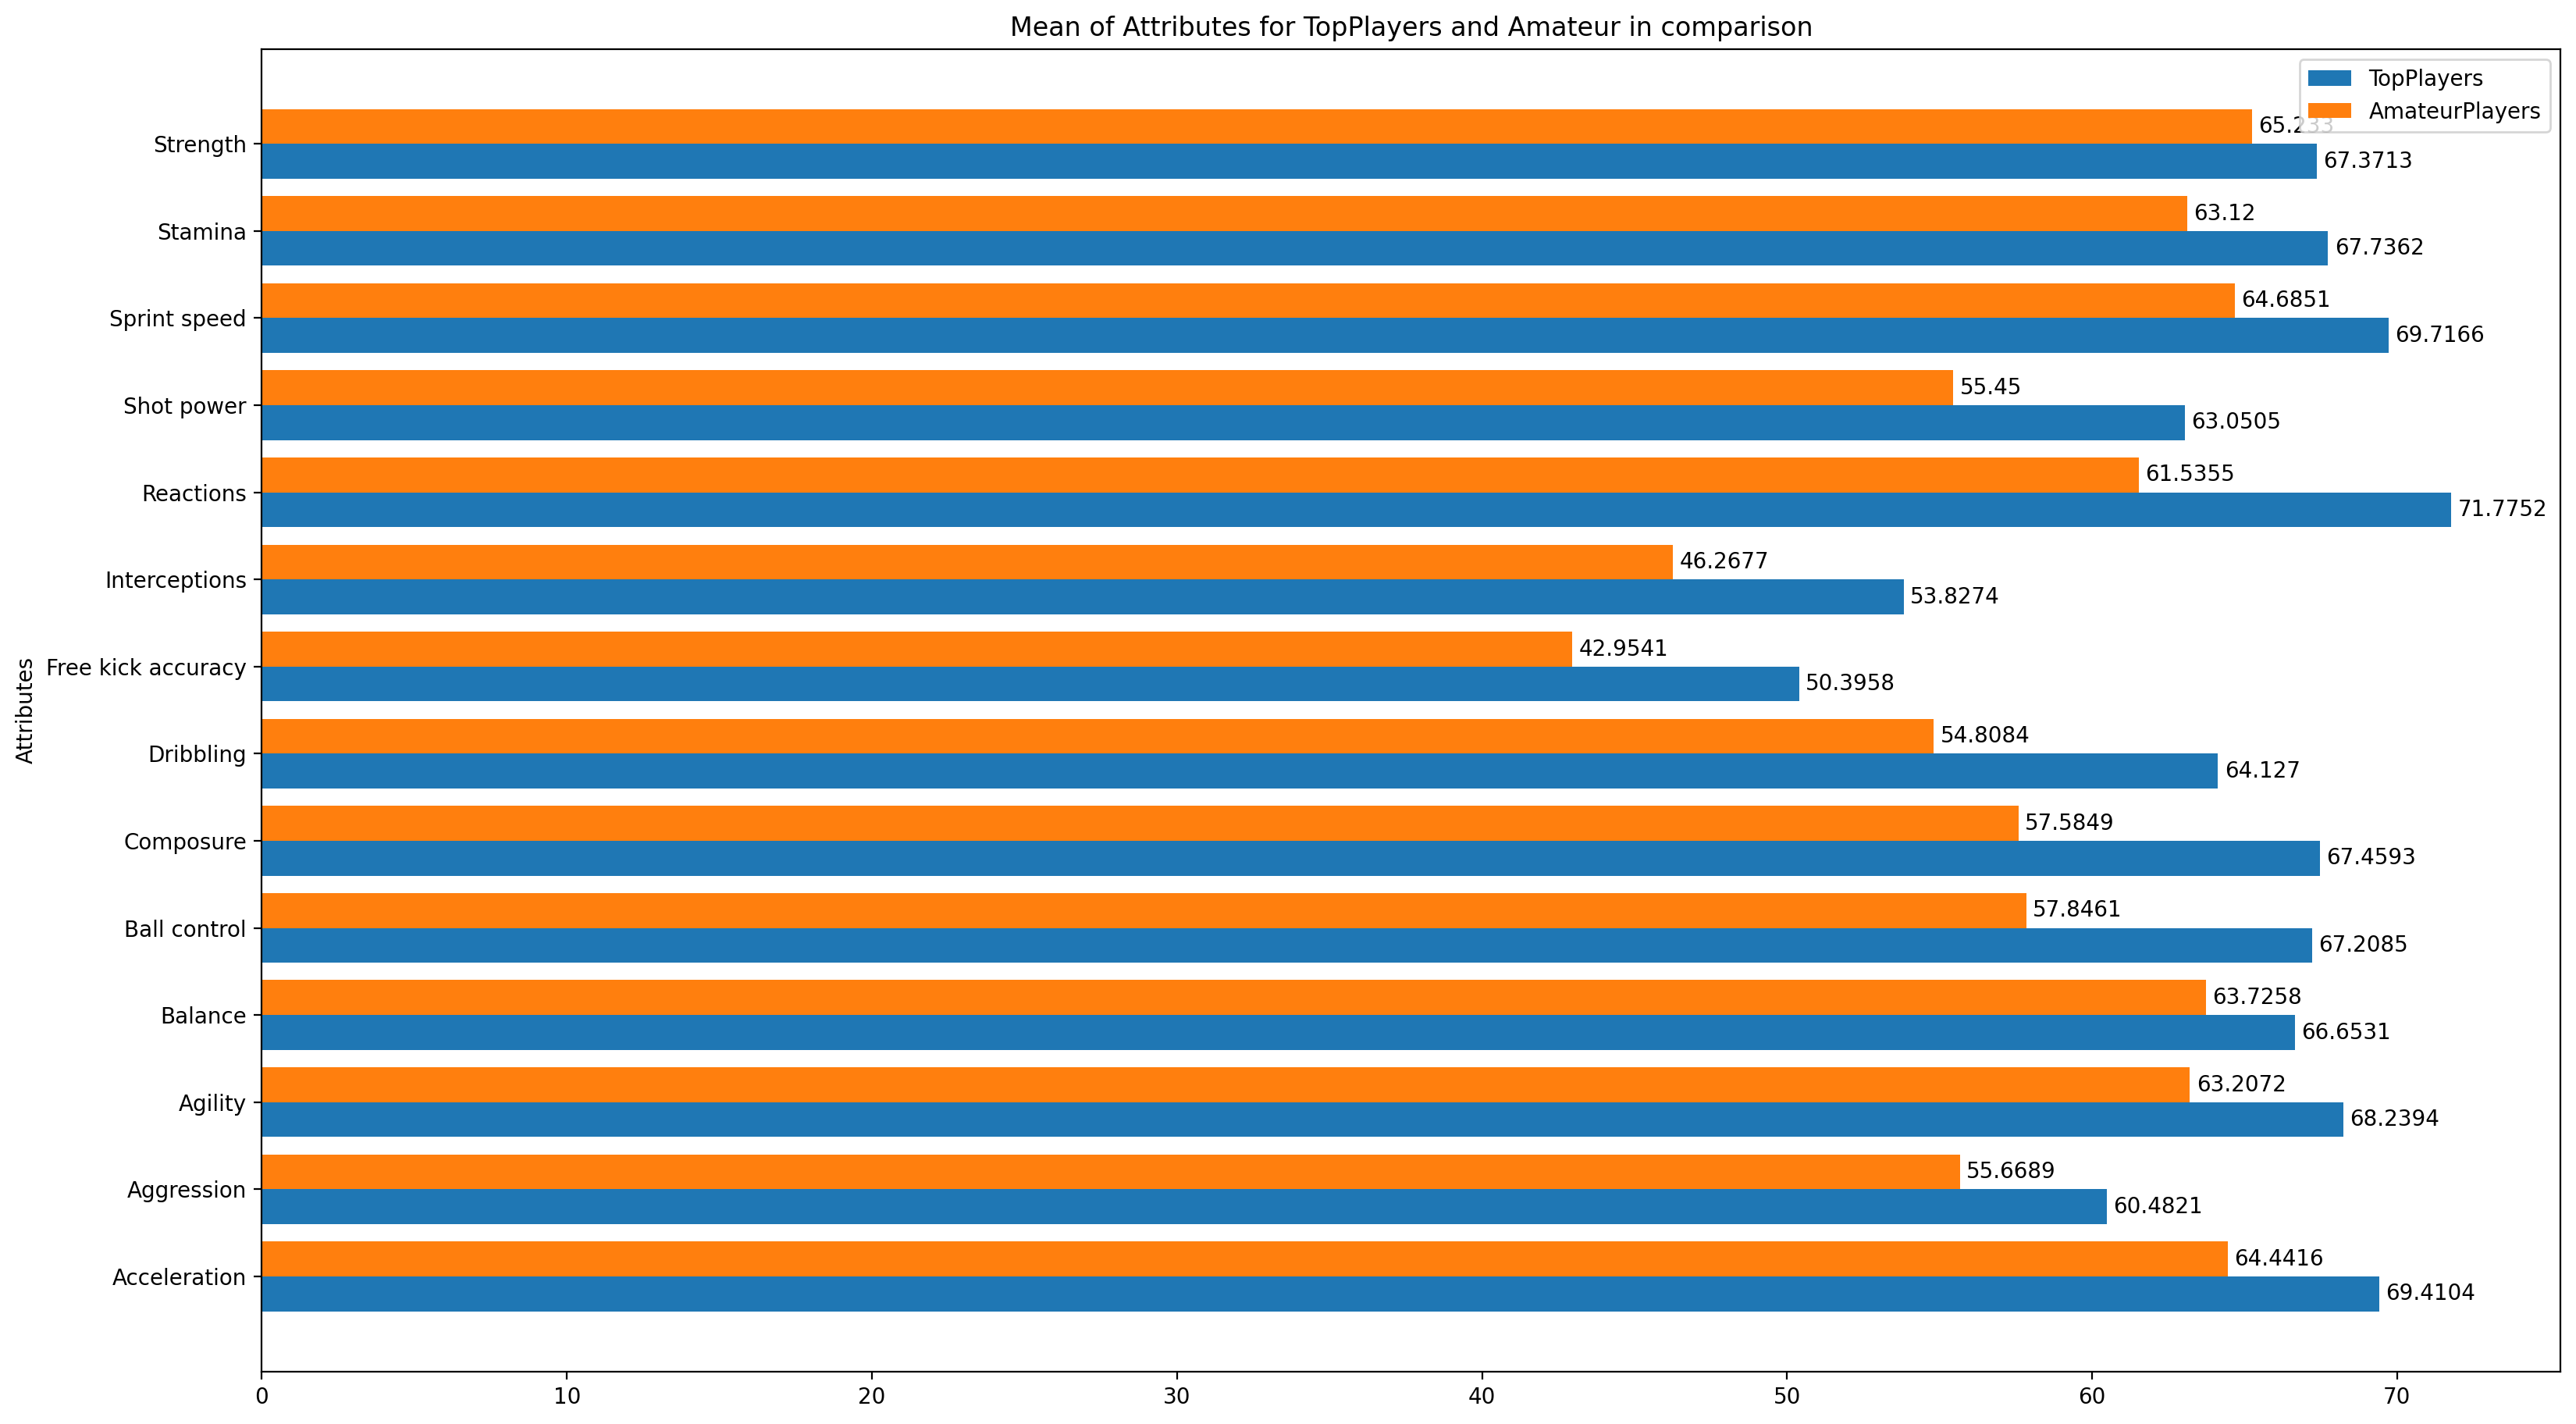

In [17]:
X_axis = np.arange(len(aPlAtt))
fig, ax = plt.subplots()
rects1 = ax.barh(X_axis - 0.2, aPlAtt, 0.4, label = 'TopPlayers')
rects2 = ax.barh(X_axis + 0.2, bPlAtt, 0.4, label = 'AmateurPlayers')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Attributes")
ax.set_title("Mean of Attributes for TopPlayers and Amateur in comparison")
ax.set_yticks(X_axis, X)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.set_size_inches(19, 11)
plt.show()

In [18]:
nations = df1['Nationality'].value_counts().reset_index()['index']

In [19]:
df5 = pd.DataFrame.copy(persData[['Nationality','Value']])
temp = pd.Series.copy(df5.Value)
temp[temp.str.endswith('€0')] = temp[temp.str.endswith('€0')].str.replace('€0','0')
temp[temp.str.contains('€')] = temp[temp.str.contains('€')].str.replace('€','')
temp[temp.str.endswith('.1M')] = temp[temp.str.endswith('.1M')].str.replace('.1M','100000')
temp[temp.str.endswith('.2M')] = temp[temp.str.endswith('.2M')].str.replace('.2M','200000')
temp[temp.str.endswith('.3M')] = temp[temp.str.endswith('.3M')].str.replace('.3M','300000')
temp[temp.str.endswith('.4M')] = temp[temp.str.endswith('.4M')].str.replace('.4M','400000')
temp[temp.str.endswith('.5M')] = temp[temp.str.endswith('.5M')].str.replace('.5M','500000')
temp[temp.str.endswith('.6M')] = temp[temp.str.endswith('.6M')].str.replace('.6M','600000')
temp[temp.str.endswith('.7M')] = temp[temp.str.endswith('.7M')].str.replace('.7M','700000')
temp[temp.str.endswith('.8M')] = temp[temp.str.endswith('.8M')].str.replace('.8M','800000')
temp[temp.str.endswith('.9M')] = temp[temp.str.endswith('.9M')].str.replace('.9M','900000')
temp[temp.str.endswith('M')] = temp[temp.str.endswith('M')].str.replace('M','000000')
temp[temp.str.endswith('K')] = temp[temp.str.endswith('K')].str.replace('K','000')
temp = temp.astype(np.float32)
df5.Value = temp
df5[df5['Nationality']=='Gabon']

C:\Users\raim1\AppData\Local\Temp\ipykernel_13544\570585953.py:5: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\raim1\AppData\Local\Temp\ipykernel_13544\570585953.py:6: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\raim1\AppData\Local\Temp\ipykernel_13544\570585953.py:7: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\raim1\AppData\Local\Temp\ipykernel_13544\570585953.py:8: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\raim1\AppData\Local\Temp\ipykernel_13544\570585953.py:9: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\raim1\AppData\Local\Temp\ipykernel_13544\570585953.py:10: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\raim1\AppData\Loca

Nationality       Value
23          Gabon  61000000.0
1012        Gabon  12000000.0
2595        Gabon   8000000.0
3609        Gabon   2500000.0
3786        Gabon   4000000.0
5421        Gabon   2700000.0
5655        Gabon   1900000.0
7677        Gabon   1200000.0
8784        Gabon    700000.0
8915        Gabon    260000.0
12062       Gabon    300000.0
14656       Gabon    280000.0

In [39]:
df4

ValueMean
Nationality             
Spain        4517443.500
England      1393662.750
Argentina    2908699.250
Italy        2721495.750
France       3340557.250
...                  ...
Kenya        4013571.500
Costa Rica   3038275.750
Canada        758000.000
Mexico       1704569.375
DR Congo     2745603.500

[61 rows x 1 columns]

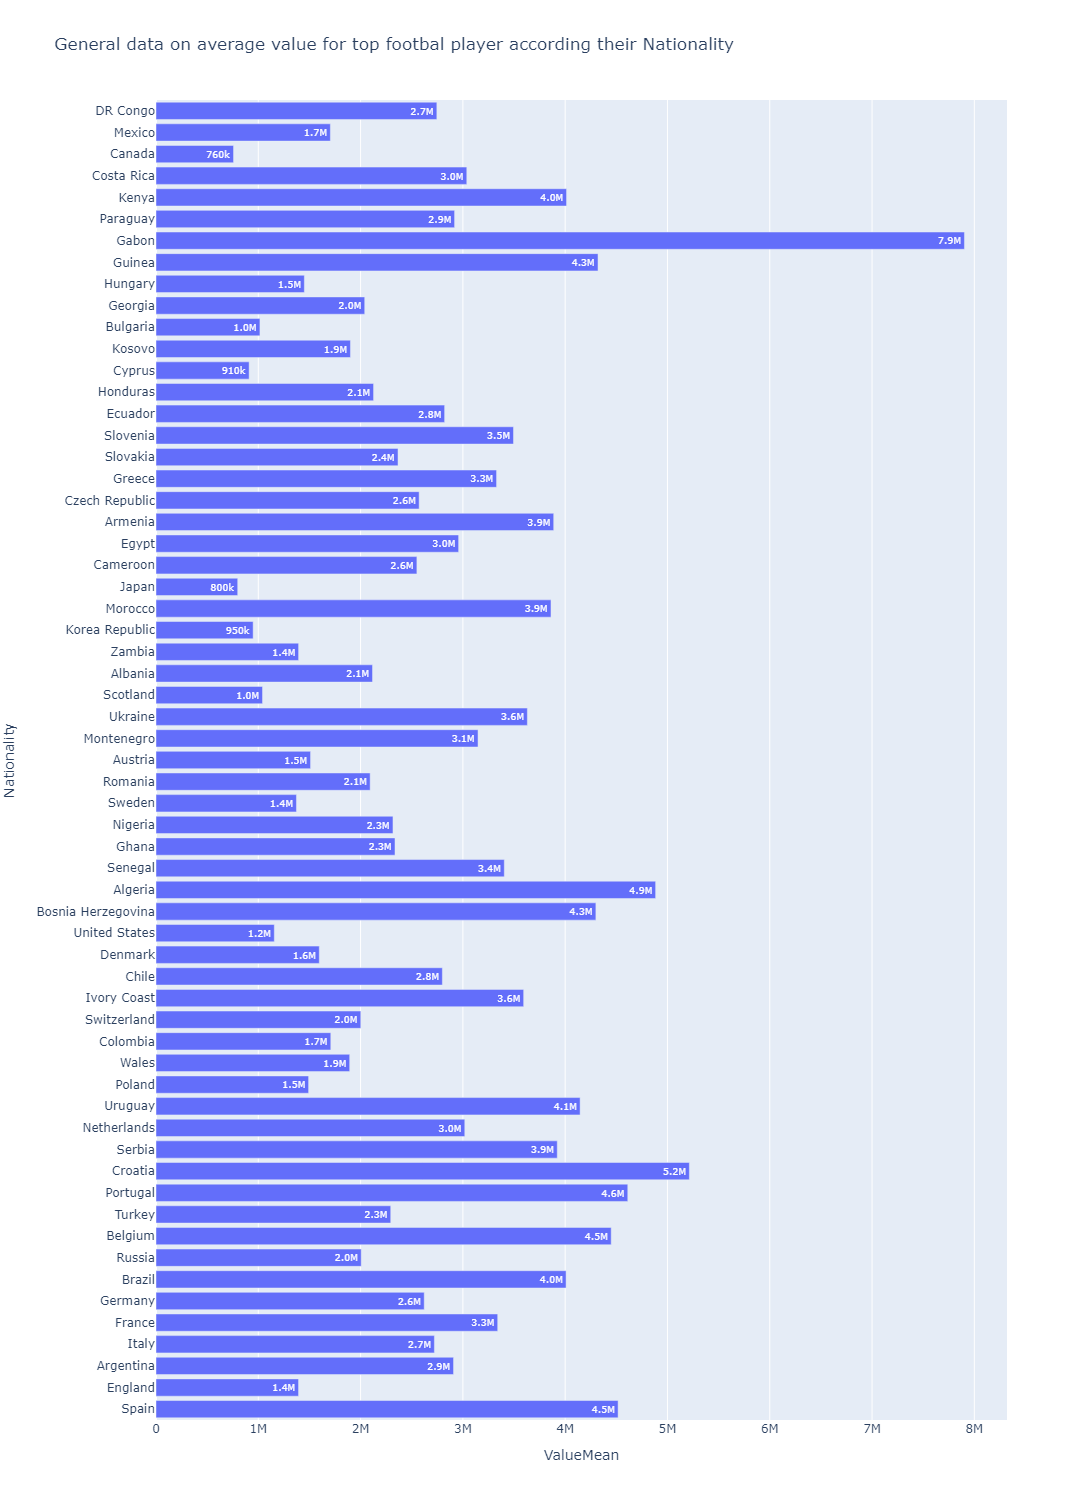

In [20]:
df4 = pd.DataFrame()
df4['Nationality'] = nations
df4['ValueMean'] = 1
j=0
for x in nations:
    df4.loc[j,'ValueMean'] = df5[df5['Nationality']==x].Value.mean()
    j=j+1
df4 = df4.set_index('Nationality')


fig = px.bar(df4, x='ValueMean', text_auto='.2s',
            title="General data on average value for top footbal player according their Nationality", width=1000, height=1500)
fig.show()

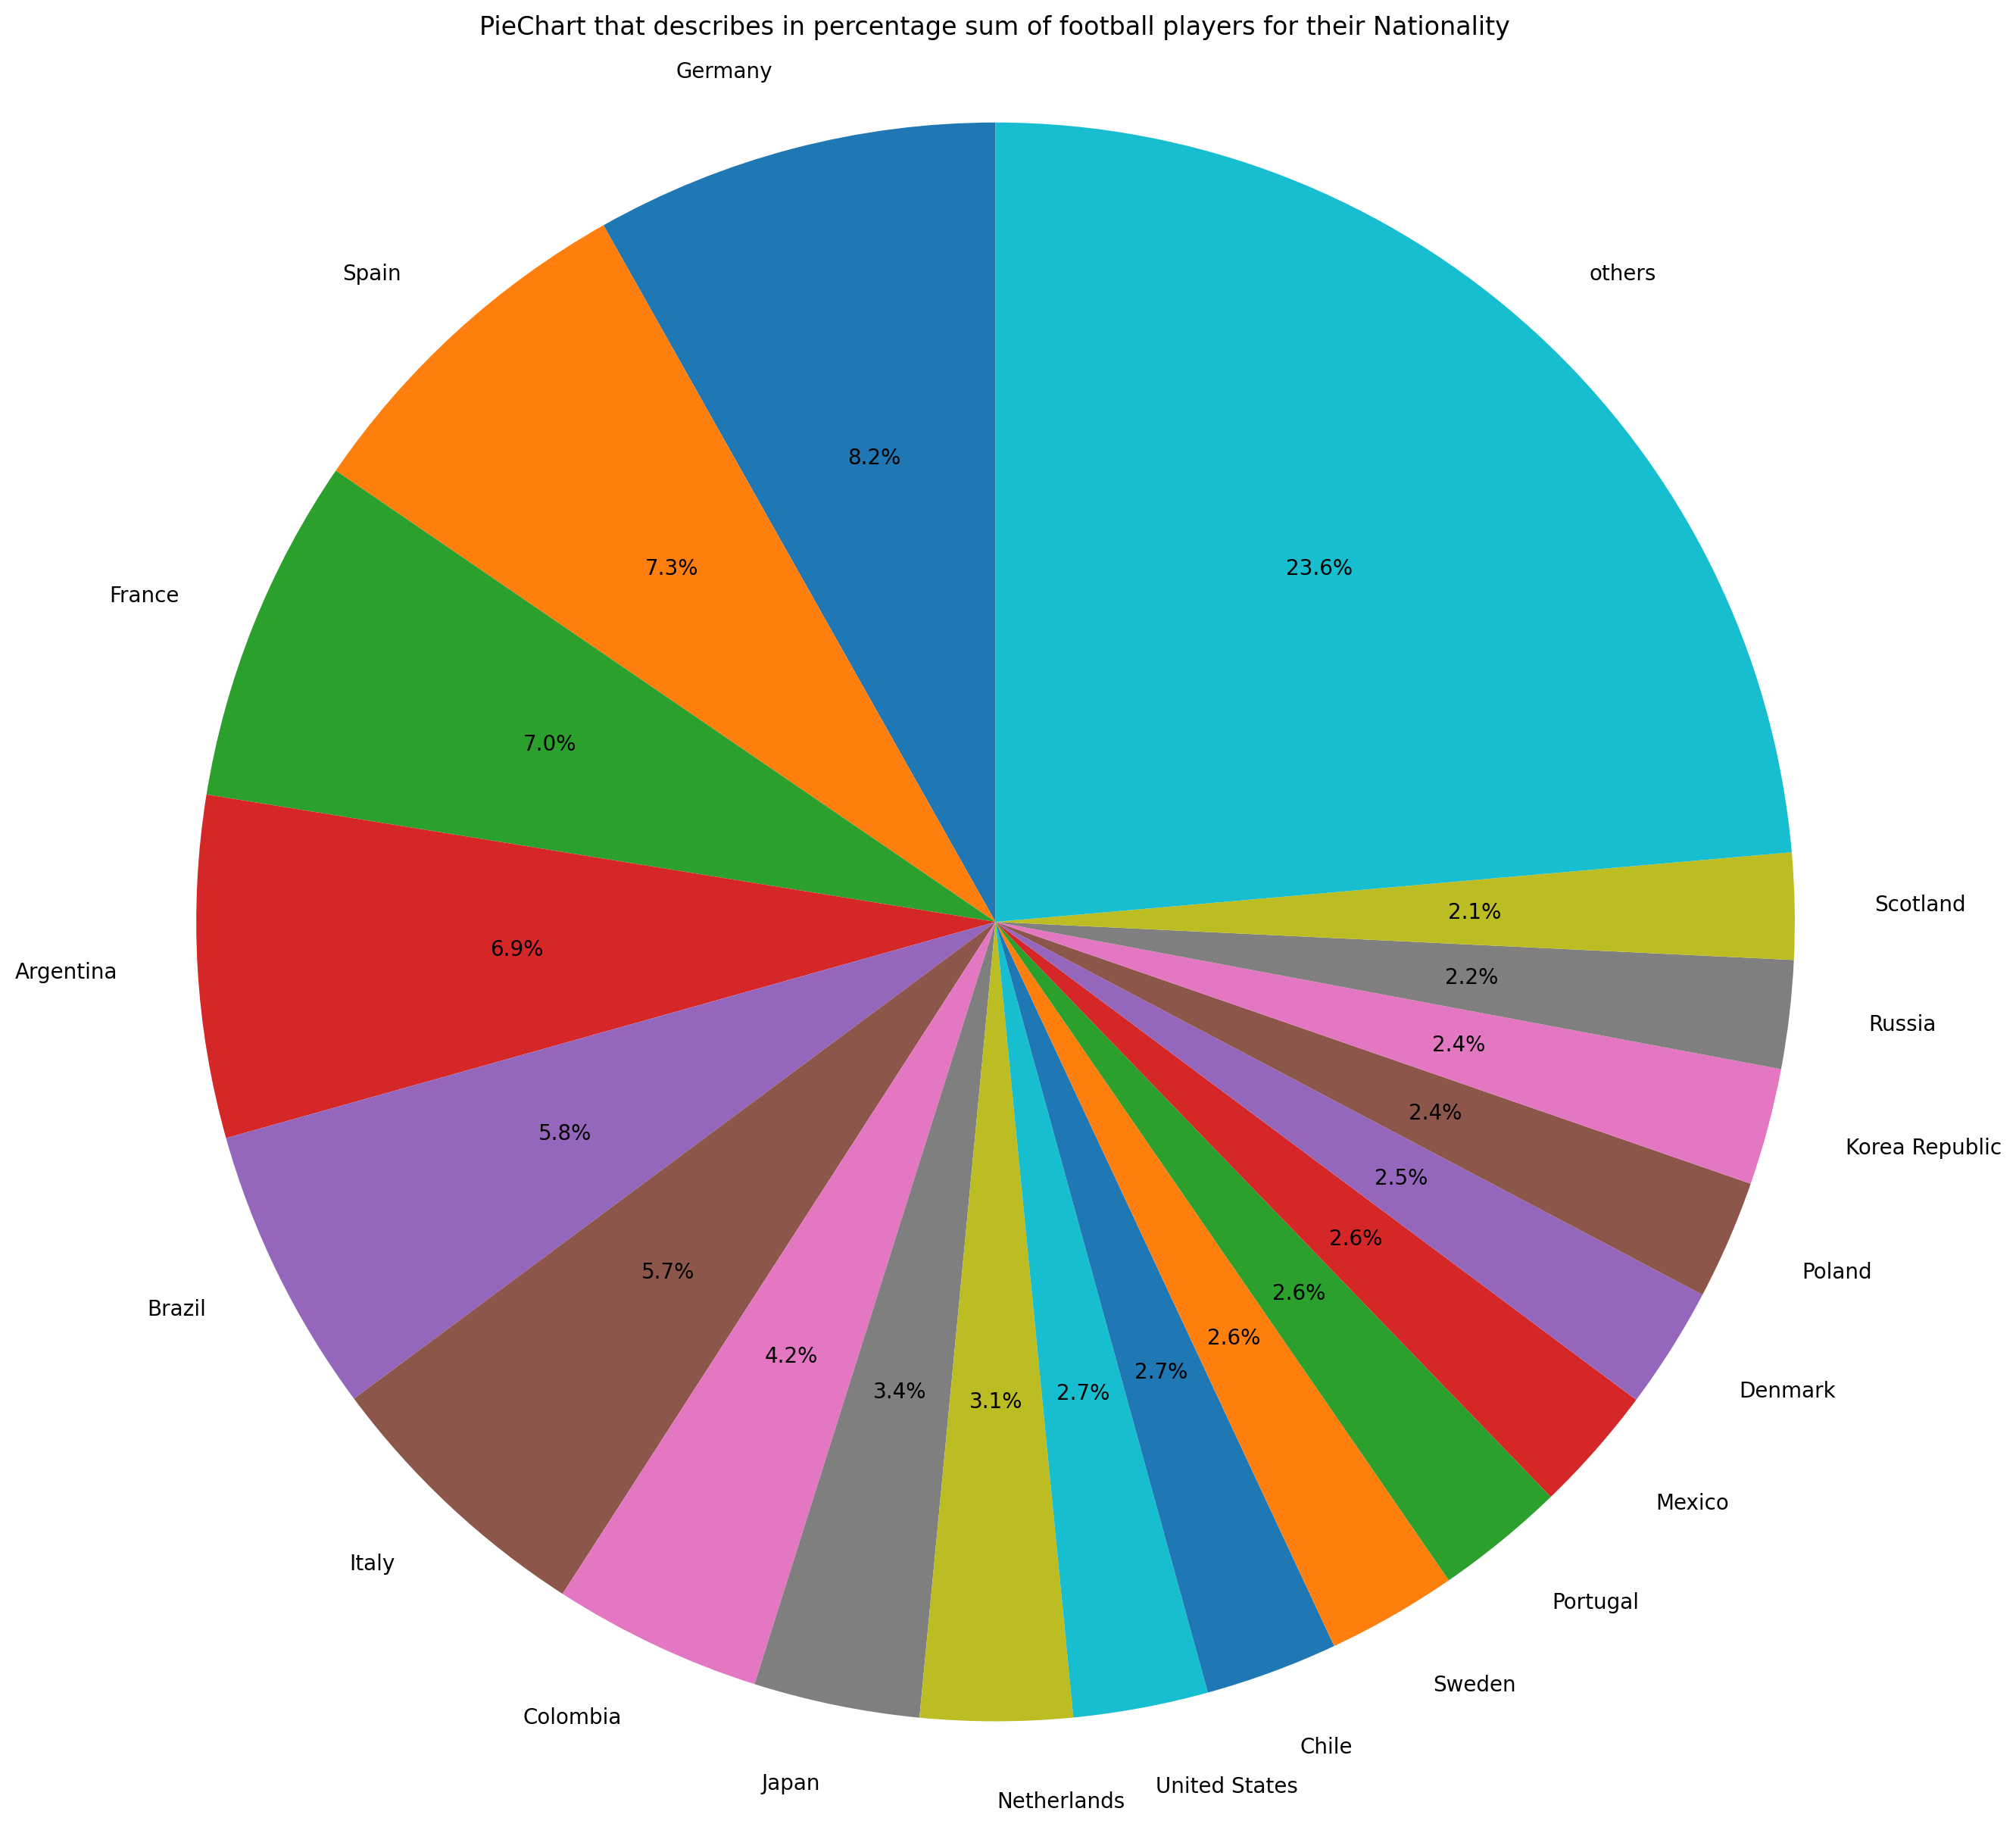

In [45]:
df6 = pd.DataFrame()
df6['Nationality'] = nations
df6['Count'] = 1
j=0
for x in nations:
    df6.loc[j,'Count'] = df5[df5['Nationality']==x].Value.count()
    j=j+1
df6 = df6.set_index('Nationality')

dt = df6.sort_values('Count', ascending=False).Count[1:20]
dt['others'] = df6.sort_values('Count', ascending=False).Count[20:].sum()

fig1, ax1 = plt.subplots()
ax1.pie(dt.values, labels=dt.index ,autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('PieChart that describes in percentage sum of football players for their Nationality')
fig1.set_size_inches(15,15)
plt.show()